## The Data Generator

<img src="DAG_chain.png" alt="Drawing" style="width: 300px;"/>

$X \sim \mathcal{N}(0,1)$

$Y \leftarrow X + \mathcal{N}(0,1)$

$Z \leftarrow Y + \mathcal{N}(0,1)$

This structure implies the following relations

* $MI(X;Z) \neq 0$

* $CMI(X;Z|Y) = 0$

In particular, we can compute both values analytically due to the variables being jointly gaussian distributed.

## Preamble

I simulated 1000 samples ('points') from the previous model, and trained GPMCC using 10 states and 100 transitions. The number of samples for computing MI in GPMCC were the same as the number of points, that is, 1000. The number of conditioned values of Y, upon which CMI was computed, was set to 100. This experiment took, in total, around 1800 s in my computer.

In order to measure learning of the model by GPMCC, I introduced the metric delta_cov,

$$ \Delta_{cov} =||\Sigma_{emp} - \Sigma_{cc}||_{F} $$

which is the distance, in Frobenius norm, between the empirical covariance matrix from the original data, and the one from the simulated data from GPMCC. 

In [1]:
from gaussian_chain import *
import pickle

learn_params =  {'num_points': 1000, 'num_states': 10, 'num_transitions': 100}
mi_params = {'num_samples': 1000}
cmi_params = {'num_samples': 1000, 'num_condition': 100}

engine, data, train_time = load_gpmcc_chain(**learn_params)
engine.num_points = learn_params['num_points']
engine.num_transitions = learn_params['num_transitions']
engine.data = data

Sigma_emp = np.cov(data.T)
mi_XZ_emp = gaussian_cmi(Sigma_emp, 0, 2, [])
cmi_XZ_gY_emp = gaussian_cmi(Sigma_emp, 0, 2, [1])

file_all_data = file('output/all_data_chain_pnts%d_stats%d_trans%d_samps%d_conds%d' %(
    learn_params['num_points'], learn_params['num_states'], learn_params['num_transitions'],\
    mi_params['num_samples'], cmi_params['num_condition']),'rb')

[ train_time, delta_cov, mi_XZ_cc, mi_compute_time, cmi_XZ_gY_cc, cmi_compute_time, delta_mi, delta_cmi ] = pickle.load(file_all_data)

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## Scatter original data and Simulated data

Scatter plot of the original data, as well as of the simulated data from three states: the one which best captures both MI and CMI (averaged), the one which best approximates the empirical covariance matrix, and the one that least approximates it.

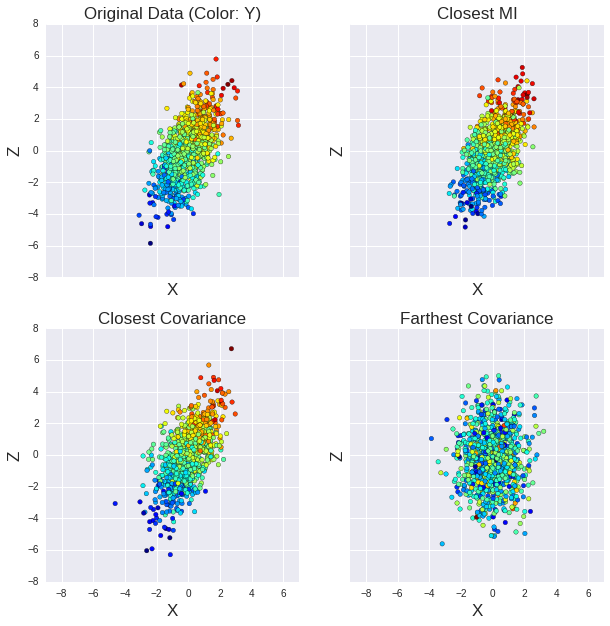

In [2]:
%matplotlib inline

scatter_data(engine, data, delta_cov, delta_mi, delta_cmi)

## Plot Dependence Probability Heatmap

Dependence probability heatmap for original data (indicator of almost non-zero entries in the covariance matrix) and for the three states of interest in gpmcc.

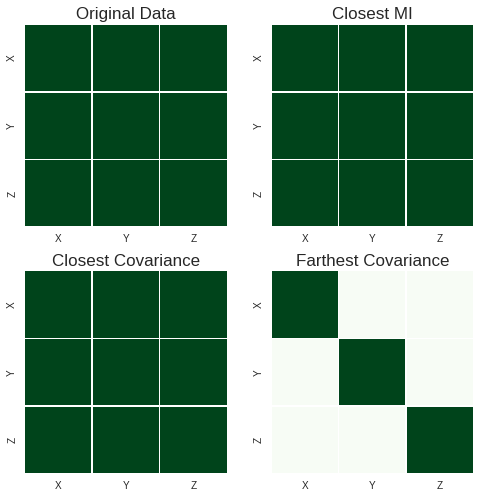

In [3]:
dependence_heatmap(engine, data, delta_cov, delta_mi, delta_cmi)

## Plot CMI and MI raster plots

Mutual information comparisons between GPMCC(below dotted line) and analytical computation using the empirical $\Sigma$ from original data. Different states are color coded. 

Size of each vertical line is $10 - \Delta_{cov}$, that is, lines fartherst from 10 are farther represent states whose $\Sigma$ is farther from original empirical $\Sigma$

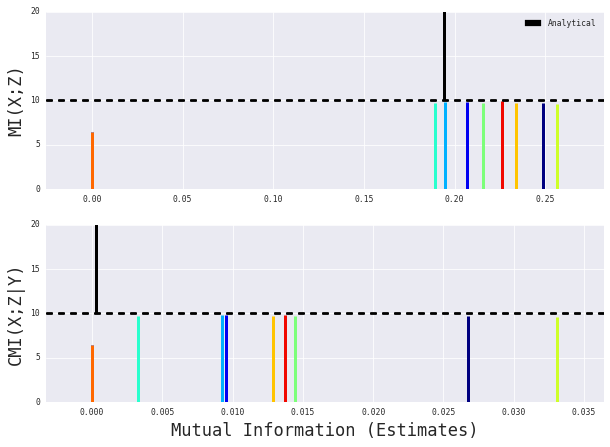

In [4]:
%matplotlib inline
raster_cmi_state(mi_XZ_cc, mi_XZ_emp, cmi_XZ_gY_cc, cmi_XZ_gY_emp, delta_cov)

## Scatter Mutual Information with $\Delta_{cov}$

Similar as before, but scattered wrt. $\Delta_{cov}$.

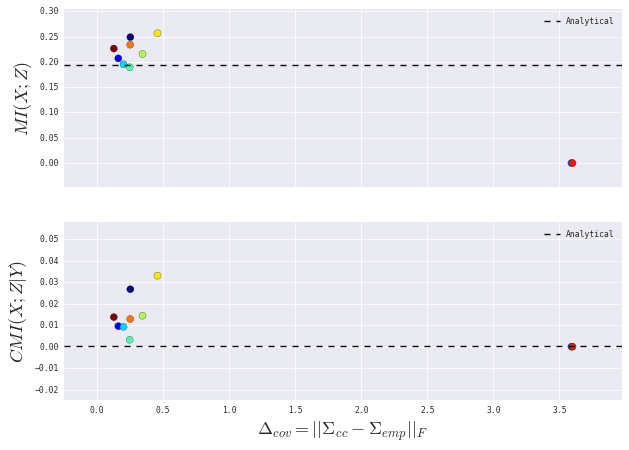

In [5]:
scatter_cmi_state(delta_cov, mi_XZ_cc, cmi_XZ_gY_cc, mi_XZ_emp, cmi_XZ_gY_emp)

** Advice from Alexey **

* plot the learned data for the 10 models
* probability of dependence metrics (aggregated or separately)
* keep track of the random seeds (to cap the maximum time of plotting)

* Frobenius metric iterative transitions

* Debug (the code that draws the plot) with small parameters
* iteratively (and sequentially) plot until I have enough

* time evolution of dependence probability metrics -> stabilizes?
*  Expect: depending on correlation strength (more mixtures for more correlation)

* Tweak parameters to reproduce the pattern above with minimal costs

* Sample from the prior of crosscat

* Dependence probability matrics for different initializations

* Dynamic plots of expectation calculation from CMI (wrt number expectations)

In my example, it should converge to a full 1 matrix, but not start from it.

* Talk to Taylor about U Test